In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
###variable declarations
nx = 41
ny = 41
nt = 300
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  # create a 1xn vector of 1's
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx)) 
vn = numpy.ones((ny, nx))
comb = numpy.ones((ny, nx))

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(0 / dy):int(0.5 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(0 / dy):int(0.5/ dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

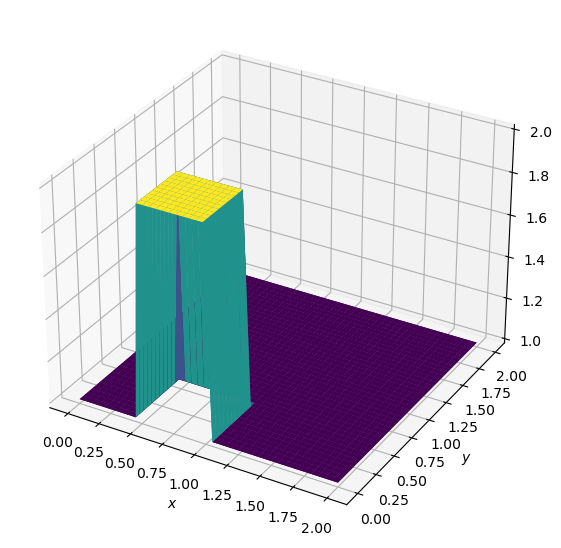

In [3]:
###(plot ICs)
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [4]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
     
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

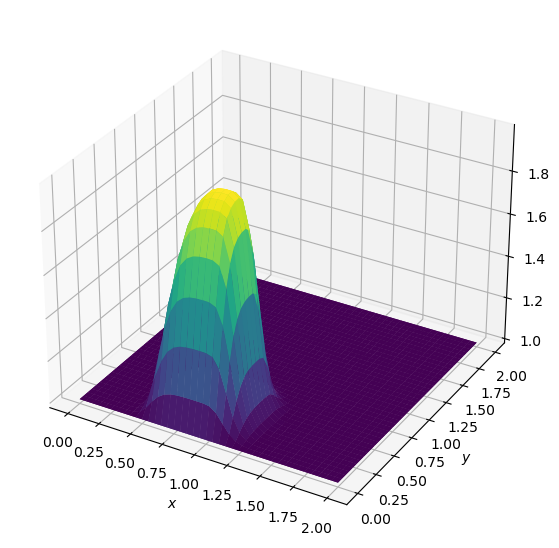

In [5]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');